# Assignment I - Part 2

Student ID : R00182510<br>
Name : Sriranjani Sridharan

## Code for Section (i) and (ii)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Calculate the distance between the fetures of the test instance and features of the training instances based on the 
# distance metric
# The valid values for distance metrics are,
#                         1 - Euclidean distance {or} 
#                         2 - Manhattan distance {or}
#                         Greater than 0 - Minkowski distance 

def calculateDistance(train_data, test_instance, dist_metric):
    
    distance = np.power((np.sum((abs(train_data-test_instance))**dist_metric,axis=1)), 1/dist_metric)
    
    # sort the index based on minimum to maximum distance values
    indices = np.argsort(distance)
    return (distance,indices)        

In [3]:
# For any K > 1, check if the K deciding classes of the test instance, have a majority class value or are in a tie
# If it is a tie, choose the class of instances that have the minimum average distance to the test instance

def check_class_tie_breaker(k_labels,k_distances):
    
    unique_class, counts = np.unique(k_labels, return_counts=True)
    
    # if there is a majority class value or only a single class value, return it
    if len(np.unique(counts)) > 1 or len(unique_class) == 1:
        return np.bincount(k_labels).argmax()
    else:
        
        # create a dictionary with class value as key and the average distance of its instances as its value
        k_distances_dict = dict.fromkeys(unique_class,0)
        for x,y in zip(k_labels,k_distances):
            k_distances_dict[x] +=  y
        
        for x,y in k_distances_dict.items():
            class_count = np.count_nonzero(k_labels == x)
            k_distances_dict[x] /= class_count
        
        # return the class with minimum average distance
        return min(k_distances_dict, key = k_distances_dict.get)         
        

In [4]:
# For every test instance, get the unweighted distances of K nearest neighbour instances and predict its class label

def predict_testlabel(k, train_data, test_data, train_label, dist_metric):
    
    predicted_test_label = []
    
    for instance in test_data:
        distance,indices = calculateDistance(train_data,instance, dist_metric)
        
        k_indices = indices[0:k]
        k_labels = [int(x) for x in np.take(train_label,k_indices)]
        k_distances = np.take(distance,k_indices)        
        
        # if K = 1, retun the class of the Kth neighbour 
        # else for K > 1 return the majority class or the class which has minimum average distance based on the tie breaker function 
        if k == 1:
            predicted_test_label.append(k_labels[0])
        else:
            predicted_test_label.append(check_class_tie_breaker(k_labels,k_distances))

    return predicted_test_label

In [5]:
# For every test instance, get the weighted distances of K nearest neighbour instances and predict its class label

def predict_weighted_testlabel(k, train_data, test_data, train_label, dist_metric, n):
    
    predicted_test_label = []
    
    for instance in test_data:
        vote_dict = dict.fromkeys(np.unique(train_label),0)
        distance,indices = calculateDistance(train_data, instance, dist_metric)
        k_indices = [indices[i] for i in range(0, k)]
        
        # for every kth training instance, calculate its inverse distance or voting distance
        # create a dictionary, store the kth training class as the key and all its inverse distances as the value
        for x in k_indices:
            vote_dict[train_label[x]] += (1/(distance[x])**n)
    
        # return the kth training class with the maximum value of voting distance
        predicted_test_label.append(max(vote_dict, key = vote_dict.get))
        
    return predicted_test_label
        

In [6]:
# Normalization of training and test data is done so that each feature has an equal contribution in the prediction process

def Normalize_data(train, test):
    trainmin, trainmax = np.amin(train, axis = 0), np.amax(train, axis = 0)
    
    # Use the same max and min values from the training data to normalize both the training and the test data
    train_data = (train - trainmin)/ (trainmax - trainmin)
    test_data = (test - trainmin)/ (trainmax - trainmin)
    
    return (train_data, test_data)

In [7]:
# Get the K value, distance metrics and the type of KNN algorithm - weighted = 1 (weighted) or None (Basic)

# The keyword argument n, passed to the weighted KNN will be used in calculating the inverse distance or inverse distance 
# square. The default value is 1

# The keyword argument Normalize is used to normalize the training and test datasets. 
# Default value is None - No normalization

def KNN_main_classification(k, dist_metric, weighted = None, n = 1, Normalize = None):
    
    # read input files
    train = np.genfromtxt('.\\data\\classification\\trainingData.csv',delimiter = ',')
    test = np.genfromtxt('.\\data\\classification\\testData.csv',delimiter = ',')
    
    k_values = k
    k_predictions_accuracy = []
     
    
   # Segregate the class labels from the feature data in both the training and test datasets
    train_label = train[:,-1]
    test_label = test[:,-1]
    
    # Normalize the training and the test data if Normalization is not None 
    if Normalize:
        train_data, test_data = Normalize_data(train[:,0:-1], test[:,0:-1]) 
    else:
        train_data = train[:,0:-1]
        test_data = test[:,0:-1]

    # for every K value, determine the KNN algorithm predictions and accuracy for the test data
    for k in k_values:
        
        if weighted:
            predicted_labels = np.array(predict_weighted_testlabel(k, train_data, test_data, train_label, dist_metric, n),dtype = float)
        else:
            predicted_labels = np.array(predict_testlabel(k, train_data, test_data, train_label, dist_metric),dtype = float)
            
        k_accuracy = (np.sum(predicted_labels == test_label) / len(test_label)) * 100
        
        k_predictions_accuracy.append(k_accuracy)
        
        print("K : %d , Accuracy : %3.4f%%" %(k, k_accuracy))
    
    return k_predictions_accuracy

## Section(i) Results

In [8]:
# Pass the K-values and the required distance metric to the weighted and unweighted KNN algorithms

K = [10]
dist_metric = 2

print("Distance Metric : Euclidean")
print("\nBasic KNN")
K_basic = KNN_main_classification(K, dist_metric, weighted = None)   

print("\nWeighted KNN")
K_weighted = KNN_main_classification(K, dist_metric, weighted = 1)


Distance Metric : Euclidean

Basic KNN
K : 10 , Accuracy : 92.5000%

Weighted KNN
K : 10 , Accuracy : 92.7000%


## Section (ii) Results

In an attempt to observe an improvement with the classification accuracy, a series of experiments were studied by varying the hyper-parameters such as the value of K, the distance metric used and with normalized training data . 

The experiments that were conducted and its results are discussed below.

The experiments were conducted individually for both the Basic KNN implemented in Part1 and for the Weighted KNN implemented above.

### Basic KNN - Experiment 1 (Varying K values)

In KNN algorithm, it is crucial to determine the optimal value for K, which identifies the K closest neighbours to a particular query instance. The class of the query instance is determined by the class values of the K nearest neighbours in the feature space. An optimal K value, identifies the subset of the training instances that best classify the query instance. In order to study the classification accuracy for different values of K, the range of K was extended from 1 to 50. 

The remaining hyperparameters were set to the default values as given below.<br>
Weighted = None <br>
distance metric = 2 (Euclidean Distance)

In [9]:
K = range(1,50,2)
dist_metric = 2

print("Distance Metric : Euclidean")

print("\nBasic KNN")
K_basic = KNN_main_classification(K, dist_metric, weighted = None)   


Distance Metric : Euclidean

Basic KNN
K : 1 , Accuracy : 89.5000%
K : 3 , Accuracy : 91.3000%
K : 5 , Accuracy : 92.4000%
K : 7 , Accuracy : 92.2000%
K : 9 , Accuracy : 92.8000%
K : 11 , Accuracy : 91.8000%
K : 13 , Accuracy : 91.9000%
K : 15 , Accuracy : 92.4000%
K : 17 , Accuracy : 91.7000%
K : 19 , Accuracy : 91.7000%
K : 21 , Accuracy : 91.4000%
K : 23 , Accuracy : 91.3000%
K : 25 , Accuracy : 90.6000%
K : 27 , Accuracy : 90.8000%
K : 29 , Accuracy : 90.7000%
K : 31 , Accuracy : 90.3000%
K : 33 , Accuracy : 90.1000%
K : 35 , Accuracy : 90.4000%
K : 37 , Accuracy : 90.8000%
K : 39 , Accuracy : 90.8000%
K : 41 , Accuracy : 90.1000%
K : 43 , Accuracy : 90.2000%
K : 45 , Accuracy : 90.0000%
K : 47 , Accuracy : 89.8000%
K : 49 , Accuracy : 90.0000%


The plotted figure below, shows the predicted accuracy levels for different values of K . It can be observed that the highest performance was achieved, when K was set to 9. 


As K increases after 9, the accuracy level drops, although there are minor fluctuations in between which are insignificant. The highest peak at K=9 indicates that it might be the optimal value for the KNN algorithm with the default setting for all the remaining hyperparameters. 

By varying the other hyperparameters for the KNN algorithm, we can observe to see if the acuuracy levels improve.


Performance is the highest at K =  9


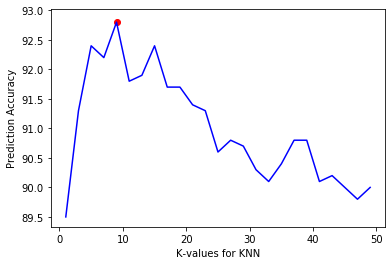

In [10]:
max_index = np.argmax(K_basic)

print("\nPerformance is the highest at K = ",K[max_index])
plt.plot(K, K_basic, color='b')
plt.scatter(K[max_index], K_basic[max_index], color ='r')
plt.xlabel('K-values for KNN')
plt.ylabel('Prediction Accuracy');

### Basic KNN - Experiment 2 (Using different distance metrics)

The distance metric used in the KNN algorithm, helps determine the similarity between two instances in feature space. Hence, it is important to choose the metric that has better levels of accuracy in predition. The distance metrics studied in the current experiment are given below.

- Euclidean Distance - measures the straight line distance betwen two points in the feautre space<br>
- Manhattan Distance - measures the distance of the points paralell to each axis in the feature space (excluding diagnols)<br>
- Minkowski Distance - is a generalization of the above two distance metrics and is determined by the below formula.
 $$d(p,q) = (\sum_{i=1}^n |p^i-q^i|^a)\stackrel{1}{a}$$

    When a = 1 , we get the Manhattan distance<br>
    when a = 2, we get the Euclidean distance <br>
    a, can be substituted with any value greater than 0, but as a increases, the features with larger differences, are   
    emphasized more in the measured distance than the features with smaller differences.
    
The accuracy for all the distance metrics with K ranging from 1 20, was recorded.

In [11]:
K = range(1,20,2)

print("\nBasic KNN")
print("\nUsing Euclidean Distance")
K_basic_Euclidean = KNN_main_classification(K, dist_metric = 2, weighted = None)
print("\nUsing Manhattan Distance")
K_basic_Manhattan = KNN_main_classification(K, dist_metric = 1, weighted = None)
print("\nUsing Minkowski Distance")
K_basic_Minkowski = KNN_main_classification(K, dist_metric = 3, weighted = None)





Basic KNN

Using Euclidean Distance
K : 1 , Accuracy : 89.5000%
K : 3 , Accuracy : 91.3000%
K : 5 , Accuracy : 92.4000%
K : 7 , Accuracy : 92.2000%
K : 9 , Accuracy : 92.8000%
K : 11 , Accuracy : 91.8000%
K : 13 , Accuracy : 91.9000%
K : 15 , Accuracy : 92.4000%
K : 17 , Accuracy : 91.7000%
K : 19 , Accuracy : 91.7000%

Using Manhattan Distance
K : 1 , Accuracy : 89.7000%
K : 3 , Accuracy : 90.3000%
K : 5 , Accuracy : 91.1000%
K : 7 , Accuracy : 92.0000%
K : 9 , Accuracy : 91.7000%
K : 11 , Accuracy : 91.5000%
K : 13 , Accuracy : 91.7000%
K : 15 , Accuracy : 91.4000%
K : 17 , Accuracy : 90.3000%
K : 19 , Accuracy : 90.3000%

Using Minkowski Distance
K : 1 , Accuracy : 89.3000%
K : 3 , Accuracy : 91.6000%
K : 5 , Accuracy : 92.1000%
K : 7 , Accuracy : 91.9000%
K : 9 , Accuracy : 92.0000%
K : 11 , Accuracy : 91.7000%
K : 13 , Accuracy : 91.5000%
K : 15 , Accuracy : 91.3000%
K : 17 , Accuracy : 91.1000%
K : 19 , Accuracy : 91.8000%


From the below figure, it can be observed that the predictions using Euclidean distance have higher accuracy than the the other two distance metrics. The Minkowski distance with a = 3, has resulted in a mediocre performance and the one with Manhattan resulted in the lowest perormance.


We can clearly infer that Manhattan is not the best distance metric to be used for the current datset. However, the value of a can be increased in the Minkowski distance to see if it results in an improvement over using the Euclidean distance. For the current dataset, no improvements were observed.

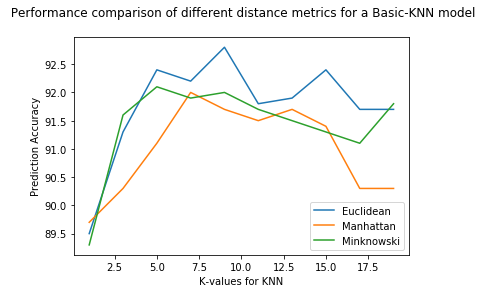

In [12]:

plt.plot(K, K_basic_Euclidean)
plt.plot(K, K_basic_Manhattan)
plt.plot(K, K_basic_Minkowski)
plt.legend(['Euclidean','Manhattan','Minknowski'], loc = 'lower right')
plt.xlabel('K-values for KNN')
plt.ylabel('Prediction Accuracy');
plt.title(' Performance comparison of different distance metrics for a Basic-KNN model\n');

### Basic KNN - Experiment 3 (Using Normalization of data)

Eventhough the distance metrics is an important parameter to be considered, there still might be certain issues, if the feautres in the dataset are significantly different from one another. By different, it means that one feature could have a different range of values than the other. 

For example, Feature A could have values ranging between 1-5 while Feature B  could have values ranging between 1-500. The distance calculations with such features can end up in results that are biased towards one feature(Feature B as indicated in the example) due to the higher range of values.

In order to overcome the above situation and to make sure all features contribute independently, they can be normalized by scaling all the feature data to have values between 0 and 1.

Keeping the distance metric as Euclidean, the experiment for Normalization was executed by passing the keyword argument Normalize = 1 to the KNN algorithm. The accuracy from the normalized data was recorded as given below.

In [13]:
K = range(1,50,2)
dist_metric = 2

print("Distance Metric : Euclidean")
print("\nBasic KNN")
K_basic_Norm = KNN_main_classification(K, dist_metric, weighted = None, Normalize = 1)


Distance Metric : Euclidean

Basic KNN
K : 1 , Accuracy : 89.3000%
K : 3 , Accuracy : 90.3000%
K : 5 , Accuracy : 92.3000%
K : 7 , Accuracy : 92.5000%
K : 9 , Accuracy : 92.6000%
K : 11 , Accuracy : 92.6000%
K : 13 , Accuracy : 92.3000%
K : 15 , Accuracy : 92.1000%
K : 17 , Accuracy : 91.7000%
K : 19 , Accuracy : 91.8000%
K : 21 , Accuracy : 91.1000%
K : 23 , Accuracy : 91.4000%
K : 25 , Accuracy : 91.0000%
K : 27 , Accuracy : 91.0000%
K : 29 , Accuracy : 90.7000%
K : 31 , Accuracy : 90.5000%
K : 33 , Accuracy : 90.5000%
K : 35 , Accuracy : 90.1000%
K : 37 , Accuracy : 90.4000%
K : 39 , Accuracy : 90.6000%
K : 41 , Accuracy : 90.0000%
K : 43 , Accuracy : 89.8000%
K : 45 , Accuracy : 89.7000%
K : 47 , Accuracy : 89.9000%
K : 49 , Accuracy : 90.0000%


When comparing the Basic KNN model with and without Normalization, the overall pattern of results look similar. However, the accuracy levels at certain K values were slightly higher without Nomalization.


In the current dataset, the feature data are not significantly different from one another, hence normalization has not added much value to improve the prediction results.


With Normalization, performance is the highest at K =  9

Without Normalization, performance is the highest at K =  9


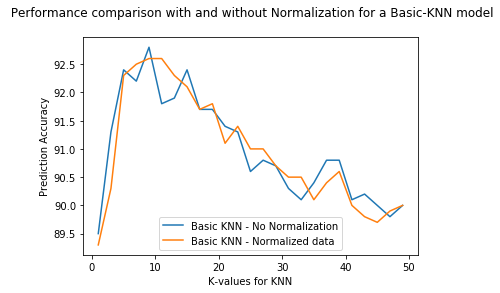

In [14]:
max_index = np.argmax(K_basic)
max_index_norm = np.argmax(K_basic_Norm)

print("\nWith Normalization, performance is the highest at K = ",K[max_index_norm])
print("\nWithout Normalization, performance is the highest at K = ",K[max_index])
plt.plot(K, K_basic)
plt.plot(K, K_basic_Norm)

plt.legend(['Basic KNN - No Normalization','Basic KNN - Normalized data'], loc = 'lower center')
plt.xlabel('K-values for KNN')
plt.ylabel('Prediction Accuracy');
plt.title(' Performance comparison with and without Normalization for a Basic-KNN model\n');

### Weighted KNN - Experiment 1 (Varying K values)

Similar to the Basic KNN model analysis, the initial experiment for the weighted KNN was to study the levels of prediction accuracy with different values of K ranging from 1 to 50. 

In [15]:
K = range(1,50,2)
dist_metric = 2

print("Distance Metric : Euclidean")

print("\nWeighted KNN")
K_weighted = KNN_main_classification(K, dist_metric, weighted = 1)


Distance Metric : Euclidean

Weighted KNN
K : 1 , Accuracy : 89.5000%
K : 3 , Accuracy : 91.3000%
K : 5 , Accuracy : 92.4000%
K : 7 , Accuracy : 92.4000%
K : 9 , Accuracy : 93.0000%
K : 11 , Accuracy : 91.9000%
K : 13 , Accuracy : 92.0000%
K : 15 , Accuracy : 92.1000%
K : 17 , Accuracy : 92.0000%
K : 19 , Accuracy : 91.9000%
K : 21 , Accuracy : 91.4000%
K : 23 , Accuracy : 91.4000%
K : 25 , Accuracy : 90.9000%
K : 27 , Accuracy : 91.1000%
K : 29 , Accuracy : 91.1000%
K : 31 , Accuracy : 90.7000%
K : 33 , Accuracy : 90.6000%
K : 35 , Accuracy : 90.7000%
K : 37 , Accuracy : 91.1000%
K : 39 , Accuracy : 91.1000%
K : 41 , Accuracy : 90.6000%
K : 43 , Accuracy : 90.6000%
K : 45 , Accuracy : 90.5000%
K : 47 , Accuracy : 90.2000%
K : 49 , Accuracy : 90.4000%


The figure below compares the prediction accuracy for a range of K values for the Basic KNN and the weighted KNN models.
The latter has shown an improvement in accuracy levels for most of the values.


Performance is the highest at K =  9


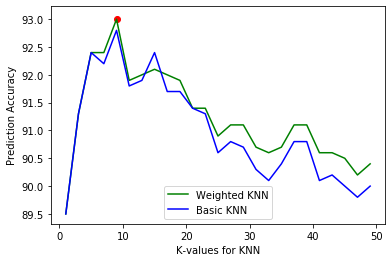

In [18]:
max_index = np.argmax(K_weighted)

print("\nPerformance is the highest at K = ",K[max_index])
plt.plot(K, K_weighted, color ='g')
plt.plot(K, K_basic, color = 'b')
plt.scatter(K[max_index], K_weighted[max_index], color ='r')
plt.xlabel('K-values for KNN')
plt.ylabel('Prediction Accuracy');
plt.legend(['Weighted KNN','Basic KNN'], loc = 'lower center');

### Weighted KNN - Experiment 2 (Using different distance metrics)

We compare the impact of using different distance metrics for the weighted KNN model. The reason behind conducting this experiment is explained in the Experiment 2 of the Basic KNN model.

In [19]:
K = range(1,20,2)

print("\nBasic KNN")
print("\nUsing Euclidean Distance")
K_weighted_Euclidean = KNN_main_classification(K, dist_metric = 2, weighted = 1)
print("\nUsing Manhattan Distance")
K_weighted_Manhattan = KNN_main_classification(K, dist_metric = 1, weighted = 1)
print("\nUsing Minkowski Distance")
K_weighted_Minkowski = KNN_main_classification(K, dist_metric = 3, weighted = 1)



Basic KNN

Using Euclidean Distance
K : 1 , Accuracy : 89.5000%
K : 3 , Accuracy : 91.3000%
K : 5 , Accuracy : 92.4000%
K : 7 , Accuracy : 92.4000%
K : 9 , Accuracy : 93.0000%
K : 11 , Accuracy : 91.9000%
K : 13 , Accuracy : 92.0000%
K : 15 , Accuracy : 92.1000%
K : 17 , Accuracy : 92.0000%
K : 19 , Accuracy : 91.9000%

Using Manhattan Distance
K : 1 , Accuracy : 89.7000%
K : 3 , Accuracy : 90.3000%
K : 5 , Accuracy : 91.1000%
K : 7 , Accuracy : 92.0000%
K : 9 , Accuracy : 91.6000%
K : 11 , Accuracy : 91.9000%
K : 13 , Accuracy : 91.6000%
K : 15 , Accuracy : 91.4000%
K : 17 , Accuracy : 90.9000%
K : 19 , Accuracy : 90.7000%

Using Minkowski Distance
K : 1 , Accuracy : 89.3000%
K : 3 , Accuracy : 91.6000%
K : 5 , Accuracy : 92.3000%
K : 7 , Accuracy : 92.0000%
K : 9 , Accuracy : 92.2000%
K : 11 , Accuracy : 92.2000%
K : 13 , Accuracy : 91.9000%
K : 15 , Accuracy : 91.4000%
K : 17 , Accuracy : 91.3000%
K : 19 , Accuracy : 92.0000%


Like the Basic KNN mode, the weighted KNN model also produces higher accuracy levels with the Euclidean distance metric and lowest accuracy levels with Manhattan distance.

The a value for the Minkowski distance can be increased to see if we can observe any performance improvement. For the current dataset, no improvements were observed.

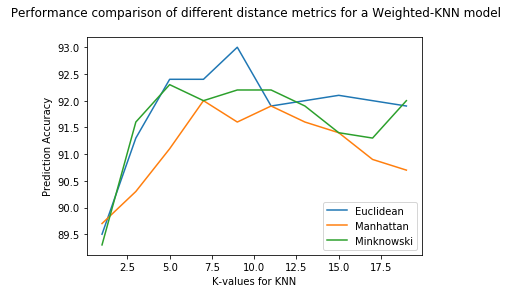

In [20]:

plt.plot(K, K_weighted_Euclidean)
plt.plot(K, K_weighted_Manhattan)
plt.plot(K, K_weighted_Minkowski)
plt.legend(['Euclidean','Manhattan','Minknowski'], loc = 'lower right')
plt.xlabel('K-values for KNN')
plt.ylabel('Prediction Accuracy');
plt.title(' Performance comparison of different distance metrics for a Weighted-KNN model\n');

### Weighted KNN - Experiment 3 (Varying inverse distance measures)

Unlike the Basic KNN, the weighted KNN has an additional hyper-parameter that can be varied in calculating the weighted distance. It can be varied as inverse distance with n = 1, or inverse distance square with n = 2. The default value is n = 1. In this experiment we will study the impact of using the inverse distance square.

In [21]:
K = range(1,20,2)
dist_metric = 2

print("Distance Metric : Euclidean") 

print("\nWeighted KNN with inverse distance")
K_weighted_invdist = KNN_main_classification(K, dist_metric, weighted = 1, n = 1)
print("\nWeighted KNN with inverse distance square")
K_weighted_invdist_sq = KNN_main_classification(K, dist_metric, weighted = 1, n = 2)

Distance Metric : Euclidean

Weighted KNN with inverse distance
K : 1 , Accuracy : 89.5000%
K : 3 , Accuracy : 91.3000%
K : 5 , Accuracy : 92.4000%
K : 7 , Accuracy : 92.4000%
K : 9 , Accuracy : 93.0000%
K : 11 , Accuracy : 91.9000%
K : 13 , Accuracy : 92.0000%
K : 15 , Accuracy : 92.1000%
K : 17 , Accuracy : 92.0000%
K : 19 , Accuracy : 91.9000%

Weighted KNN with inverse distance square
K : 1 , Accuracy : 89.5000%
K : 3 , Accuracy : 91.1000%
K : 5 , Accuracy : 92.4000%
K : 7 , Accuracy : 92.4000%
K : 9 , Accuracy : 93.0000%
K : 11 , Accuracy : 92.1000%
K : 13 , Accuracy : 92.3000%
K : 15 , Accuracy : 92.4000%
K : 17 , Accuracy : 92.4000%
K : 19 , Accuracy : 92.4000%


A comparison of the models using inverse distance and inverse disttance square is hown below in the figure. It can be observed that the accuracy levels are same for both the models upto K =10, after which the  model using inverse distance drops with respect to accuracy. Both the models report the same highest accuracy at K = 9.

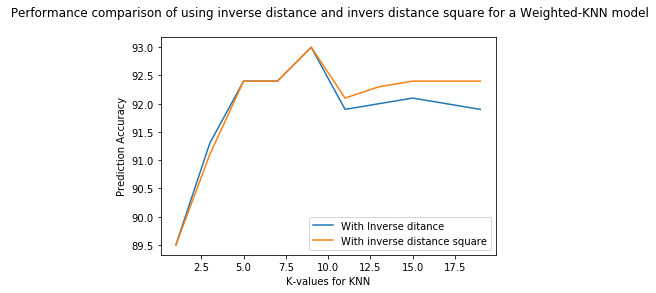

In [22]:
plt.plot(K, K_weighted_invdist)
plt.plot(K, K_weighted_invdist_sq)

plt.legend(['With Inverse ditance','With inverse distance square'], loc = 'lower right')
plt.xlabel('K-values for KNN')
plt.ylabel('Prediction Accuracy');
plt.title(' Performance comparison of using inverse distance and invers distance square for a Weighted-KNN model\n');

### Weighted KNN - Experiment 4 (Using Normalization of data)

Although Normalization does not add much value to the current dataset, the experiment was conducted with the weighted KNN model to see level of impact it has with the weighted KNN.

In [23]:
K = range(1,50,2)
dist_metric = 2

print("Distance Metric : Euclidean")
print("\nWeighted KNN")
K_weighted_Norm = KNN_main_classification(K, dist_metric, weighted = 1, n=2 , Normalize = 1)

Distance Metric : Euclidean

Weighted KNN
K : 1 , Accuracy : 89.3000%
K : 3 , Accuracy : 90.1000%
K : 5 , Accuracy : 92.6000%
K : 7 , Accuracy : 92.7000%
K : 9 , Accuracy : 92.5000%
K : 11 , Accuracy : 92.8000%
K : 13 , Accuracy : 92.8000%
K : 15 , Accuracy : 92.5000%
K : 17 , Accuracy : 92.3000%
K : 19 , Accuracy : 92.4000%
K : 21 , Accuracy : 92.0000%
K : 23 , Accuracy : 92.4000%
K : 25 , Accuracy : 92.0000%
K : 27 , Accuracy : 92.0000%
K : 29 , Accuracy : 91.9000%
K : 31 , Accuracy : 91.4000%
K : 33 , Accuracy : 91.1000%
K : 35 , Accuracy : 90.8000%
K : 37 , Accuracy : 90.9000%
K : 39 , Accuracy : 90.8000%
K : 41 , Accuracy : 90.6000%
K : 43 , Accuracy : 90.6000%
K : 45 , Accuracy : 90.7000%
K : 47 , Accuracy : 90.6000%
K : 49 , Accuracy : 90.6000%


The accuracy levels from the normalized data is more consistent across the K- values in the range of 5 to 20, whereas the pattern for the data without normalization looks skewed. Similar to the Basic KNN model, the highest accuracy was recorded by the model without Normalization.

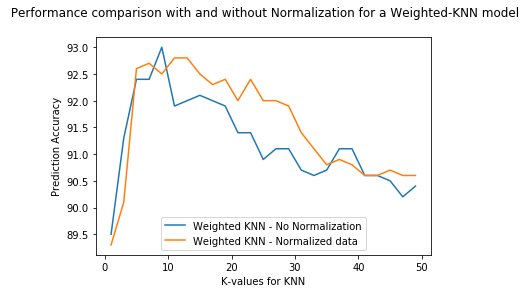

In [24]:
plt.plot(K, K_weighted)
plt.plot(K, K_weighted_Norm)

plt.legend(['Weighted KNN - No Normalization','Weighted KNN - Normalized data'], loc = 'lower center')
plt.xlabel('K-values for KNN')
plt.ylabel('Prediction Accuracy');
plt.title(' Performance comparison with and without Normalization for a Weighted-KNN model\n');

From the overall performance of all the different techniques used so far, the weighted KNN algorithm with K=9 and the distance metric using  Euclidean distance has produced the best results.

## References

The lecture slides was referred to produce the content in the report.